In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [2]:
# Load training data from the folder
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/FER2013/train',      # Path to the training folder
    image_size=(48, 48),          # Resize images to 48x48
    color_mode='grayscale',       # Since the images are grayscale
    batch_size=64,                # Batch size
    label_mode='categorical',     # Multi-class labels (emotions)
    shuffle=True                  # Shuffle the data for training
)

Found 28709 files belonging to 7 classes.


In [3]:
# Load testing/validation data from the folder
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/FER2013/test',       # Path to the test folder
    image_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    label_mode='categorical'
)

Found 7178 files belonging to 7 classes.


In [4]:
# Normalize the pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply normalization to the dataset
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

In [5]:
# Data augmentation for the training data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

# Apply augmentation to the training data only
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

In [18]:
# Model architecture
model = Sequential([
    # First Convolutional Block
    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(48, 48, 1)),
    
    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # # Third Convolutional Block
    # Conv2D(filters=384, kernel_size=3, activation='relu', padding='same'),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.4),
    
    # Fourth Convolutional Block
    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    # # Fifth Convolutional Block
    # Conv2D(filters=384, kernel_size=3, activation='relu', padding='same'),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.4),
    
    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Output Layer (7 emotion categories)
    Dense(7, activation='softmax')
])

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Model training
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 74s 164ms/step - accuracy: 0.2654 - loss: 1.8913 - val_accuracy: 0.3476 - val_loss: 1.6829
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 78s 175ms/step - accuracy: 0.3207 - loss: 1.7152 - val_accuracy: 0.3954 - val_loss: 1.5632
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 76s 169ms/step - accuracy: 0.3788 - loss: 1.5896 - val_accuracy: 0.3873 - val_loss: 1.5431
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 188ms/step - accuracy: 0.4159 - loss: 1.5162 - val_accuracy: 0.4381 - val_loss: 1.4505
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 94s 208ms/step - accuracy: 0.4256 - loss: 1.4792 - val_accuracy: 0.4712 - val_loss: 1.3777
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 190ms/step - accuracy: 0.4469 - loss: 1.4364 - val_accuracy: 0.4459 - val_loss: 1.4129
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.4506 - loss: 1.4197 - val_accuracy: 0.4915 - val_loss: 1.3183
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 86s 192ms/step - accuracy: 0.4522 - loss: 1

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5573 - loss: 1.1787
Test accuracy: 0.5505712032318115


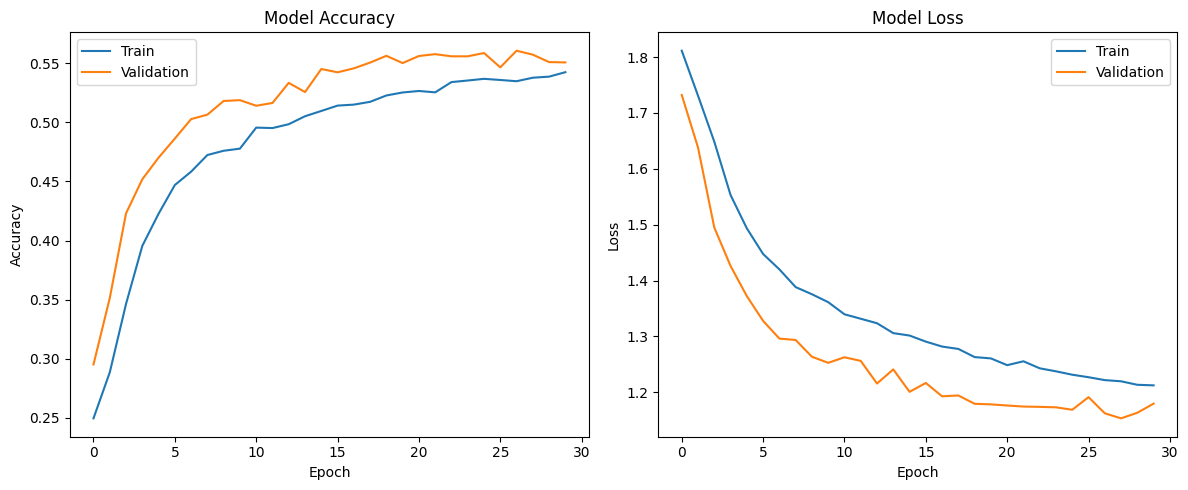

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [22]:
model.save('emotion_recognition.keras')